In [39]:
'''
CS6140 Assignment 3
Wing Man, Kwok
7 Jul 2022
'''

'\nCS6140 Assignment 3\nWing Man, Kwok\n7 Jul 2022\n'

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_digits                                #load mnist dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics                                             #compute accuracy score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, average_precision_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, RepeatedStratifiedKFold             #for cross validation k fold
from sklearn.model_selection import cross_val_score                     #for computing k fold performance
from sklearn.metrics import make_scorer

In [41]:
def print_q3_1_performance(y_test, y_pred):
  print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred), "\n")
  print("Classification Report of Baseline, MNIST Digits:")
  print(classification_report(y_test, y_pred))

In [42]:
def print_performance(clf, y_test, y_pred, X_train, y_train, X_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(clf.get_params())
  print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
  print("precision", precision_score(y_test, y_pred, average='weighted'))
  print('Recall: %.3f' % recall_score(y_test, y_pred, average='weighted'))
  print("f1_score", f1_score(y_test, y_pred, average='weighted'))
  print("\n")

In [43]:
def assign_category(accuracy):         #assign cateory from value of accuracy
    if 0 < accuracy < 0.6:
        result = "D"
    elif 0.6 < accuracy < 0.7:
        result = "C"
    elif 0.7 < accuracy < 0.8:
        result = "B"
    elif 0.8 < accuracy < 0.9:
        result = "A"
    else:
        result = "A+"
    return result

ACCURACY OF THE MODEL:  0.9833333333333333 

Classification Report of Baseline, MNIST Digits:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Confusion Matrix:


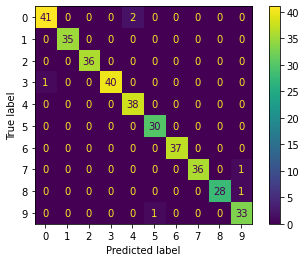

In [44]:
#Q3.1 Build a random forest classifier and find performance

digits = load_digits(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 1)

clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print_q3_1_performance(y_test, y_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [45]:
#Q3.2 Investigate Random Forest Classifier parameters

#---------- investigate random forest classifer parameters
#train a classifer with number of nodes of trees
clf = RandomForestClassifier(max_leaf_nodes = 3, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with number of trees
clf = RandomForestClassifier(n_estimators = 200, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with depth of trees
clf = RandomForestClassifier(max_depth = 1, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with min samples to split
clf = RandomForestClassifier(min_samples_split = 5, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with min samples in leaf
clf = RandomForestClassifier(min_samples_leaf = 5, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 3, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
ACCURACY OF THE MODEL:  0.8166666666666667
precision 0.8207157086672393
Recall: 0.817
f1_score 0.8086788362941011


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
ACCURACY OF THE MODEL:  0.9861111111111112
precision 0.9864306720758335
Recall: 0.986
f1_score 0.9861597912

In [46]:
# ----------- Create a dataframe with the performance results

#drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS6140 Assignment3/assignment3 q3 performance matrix.csv")

df["category"] = df["accuracy"].apply(assign_category)

print(df)

   max leaf node  n estimator  max depth  min samples split  min samples leaf  \
0              3          100          0                  2                 1   
1              0          200          0                  2                 1   
2              0          100          1                  2                 1   
3              0          100          0                  5                 1   
4              0          100          0                  2                 5   

   accuracy  precision  recall  f1_score category  
0     0.820      0.820   0.817  0.808679        A  
1     0.986      0.986   0.986  0.986000       A+  
2     0.769      0.783   0.769  0.761000        B  
3     0.980      0.980   0.980  0.980000       A+  
4     0.960      0.970   0.960  0.960000       A+  


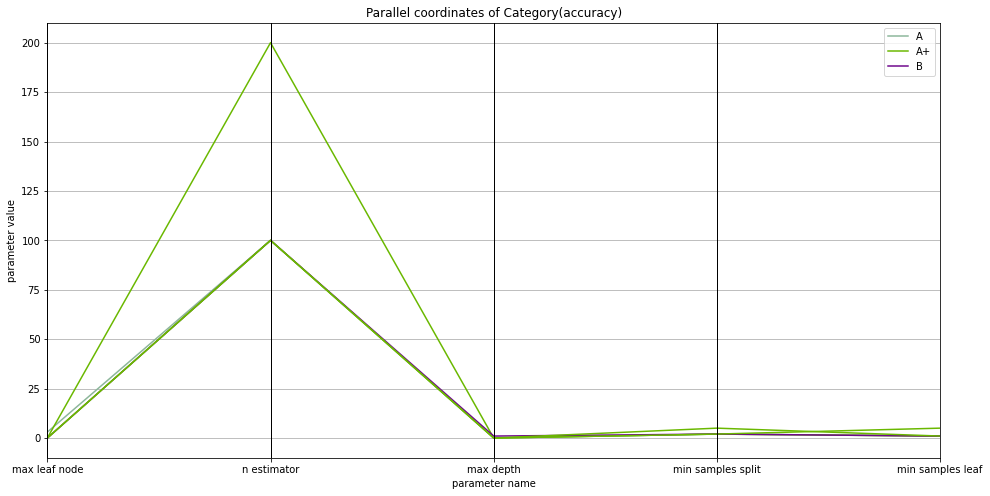

In [47]:
# plot parallel coordinates
df_t = df[["category", "max leaf node", "n estimator", "max depth", "min samples split", "min samples leaf"]]
plt.figure(figsize=(16,8))
plt.title("Parallel coordinates of Category(accuracy)")
plt.xlabel("parameter name")
plt.ylabel("parameter value")
pd.plotting.parallel_coordinates(df_t, 'category')

In [48]:
#---------------- Fine tune parameters using randomized search and grid search
# The paramater values are only suggestive. You can come up with better choices.
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 11, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

print(random_grid)

#Fine tune a classifer with number of nodes of trees using randomized search
clf = RandomForestClassifier(random_state = 1)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=1, n_jobs = -1)

print("Performance, randomized search, cv = none")
print_performance(clf_random, y_test, y_pred, X_train, y_train, X_test)
print(clf_random.best_params_)

#Fine tune a classifer with number of nodes of trees using grid search

param_grid = {
    'max_depth': [680, 780],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [900, 1000]
}

clf = RandomForestClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = -1, verbose = 2)

print("Performance, grid search, cv = none")
print_performance(grid_search, y_test, y_pred, X_train, y_train, X_test)
print(grid_search.best_params_)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 8, 11, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}
Performance, randomized search, cv = none
Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

Analysis of the impace of each tuning parameter : 
From the output above, we can see increase of number of estimator(the number of trees in the forest) from 100 to 200, produces highest accuracy, precision, recall and f1 score.  The increase in maximum depth, on the other hand, results in poorer performance.

In [ ]:
#Q3.3 Find the best estimator again and evaluate with 10 fold cross validation

#train a classifer with min samples in leaf
cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
clf = RandomForestClassifier(max_depth = 680, max_features = 2, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 900, random_state = 1)

accuracy_score = cross_val_score(clf, digits.data, digits.target, cv=cv, scoring='accuracy')
print("accuracy_score", accuracy_score.mean())

scoring = {'precision_score' : make_scorer(precision_score, average='weighted')}
precision_scores = cross_val_score(clf, digits.data, digits.target, scoring='precision_score', cv=10, n_jobs=-1, error_score='raise')
print("precision_score", precision_score_scores.mean())

scoring = {'recall_score' : make_scorer(recall_score, average='weighted')}
recall_score = cross_val_score(clf, digits.data, digits.target, scoring='recall_score', cv=10, n_jobs=-1, error_score='raise')
print("recall_score", recall_score.mean())

scoring = {'f1_score' : make_scorer(f1_score, average='weighted')}
f1_weighted_scores = cross_val_score(clf, digits.data, digits.target, scoring='f1_weighted', cv=10, n_jobs=-1, error_score='raise')
print("f1_weighted_scores", f1_weighted_scores.mean())


4.  Hyper parameters avaliable to random forest classifer could be over 10 parameters.  If we reach the best parameters by brute force, it could take prior knowledge of the behavior.

Randomized search, however, select randomly to sample a wide range of values, and also in the combination of different values to narrow down the range of hyperparameters.

Now we have got the range of parameters, Grid search is to explicitly specify settings to try, to locate a more precise values of parameters.

5.  To measure and analysis if high accuracy is due to overfitting by comparing training dataset accuracy with testing dataset for example.  If accuracy of training dataset is high but testing dataset is low, it means the model is overfit with training dataset and not generalising unseen data well.

6.  Increasing maximum features could generally improve performance as there are more options to classify.

Then the number of trees, n_estimators, determines the maximum votings or averages of predictions.  Therefore it could improve prediction performane.

Maximum depth describe the longest path between root node and leaf node.  As there are more decisions to make before reaching the leaf node, the increase of tree depth could generally improve prediction performance.